### Prerequisite Libraries

In [1]:
import PIL
from PIL import Image
from IPython.display import Image as display
from tqdm.auto import tqdm

### Defining bounds

In [2]:
xmin = -2.0
xmax = 1.0
ymin = -1.5
ymax = 1.5

### Custom input from user

In [3]:
print("Larger values leads to slower rendering time !")
iterations = int(input("Enter max. iterations : "))
img_dimension = int(input("Enter image dimensions <square> in pixels : "))

Larger values leads to slower rendering time !
Enter max. iterations : 1024
Enter image dimensions <square> in pixels : 2048


### Creating a blank canvas

In [4]:
image = Image.new("RGB", (img_dimension, img_dimension))

### Computing iterations for each pixel, and setting colour accordingly, generating upper half of image
##### feel free try different values of red (r), blue (b), green (g) to enhance appearance

In [5]:
for y in tqdm(range(int(img_dimension/2))):
    c_y = y*(ymax-ymin) / (img_dimension) + ymin
    print(" ", end = '\r')
    for x in range(img_dimension):
        c_x = x*(xmax-xmin) / (img_dimension) + xmin
        c = complex(c_x, c_y)
        z = 0
        for i in range(iterations):
             if(abs(z)>2.0):
                break 
             z = z*z + c
        r = i%4 * 64
        b = i%16 * 16
        g = i%32 * 32
        colour = r + b*65536 + g*25
        image.putpixel((x, y), colour)
print("Upper half image generated")

 
Upper half image generated


### Displaying the complete generated image of Mandlebrot set

Complete image generated


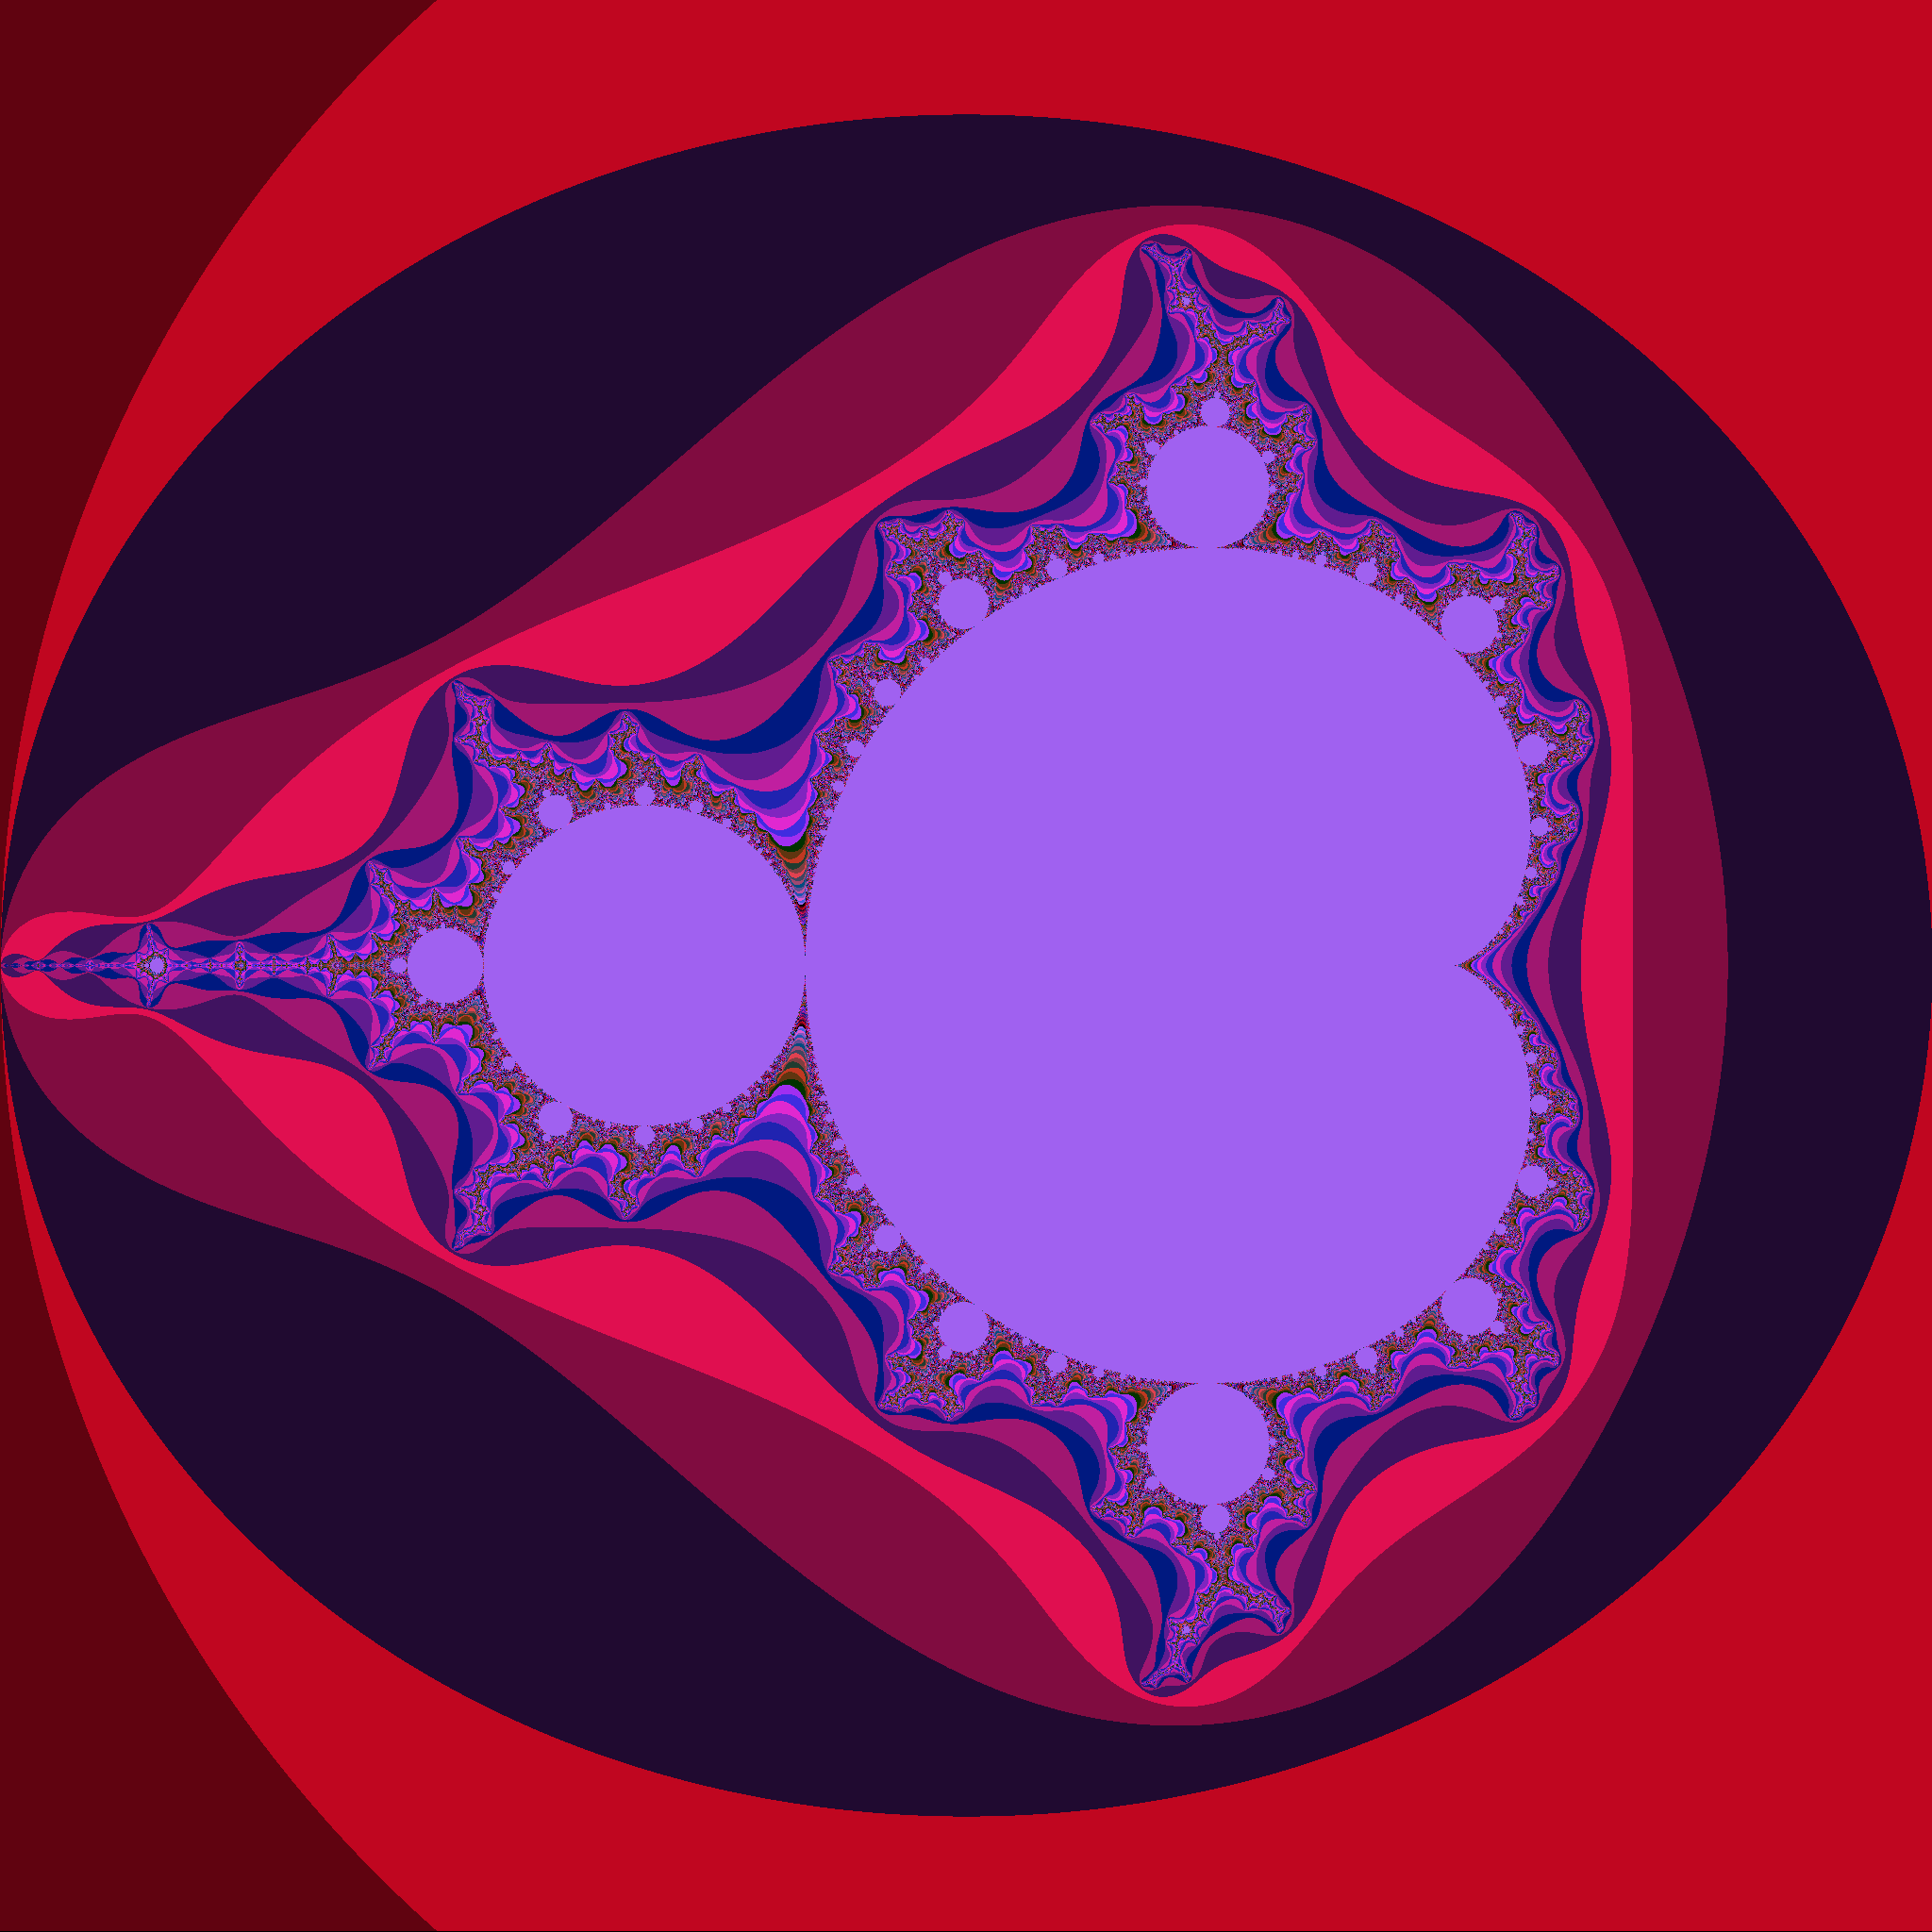

In [6]:
image.paste(image.crop((0, 0, img_dimension, int(img_dimension/2-1))).transpose(PIL.Image.FLIP_TOP_BOTTOM), (0, int(img_dimension/2)))
print("Complete image generated")
image

### Saving Mandlebrot set image file to Outputs folder

In [7]:
file_name = "Outputs\Mandlebrot_" + str(img_dimension) + "x" + str(img_dimension) + "_" + str(iterations) + "iterations.png"
image.save(file_name, "PNG")